In [1]:
# 1. Funktionen und Bibliotheken

# Löscht alle Variablen aus der aktuellen Sitzung um sicherzustellen 
# dass keine alten Werte oder Definitionen den Code beeinflussen.
%reset -f

# Importieren der benötigten Bibliotheken
import numpy as np  # Für numerische Berechnungen
import pandas as pd  # Für die Arbeit mit Tabellen Datensätzen
import matplotlib.pyplot as plt  # Für graphische Darstellung
from sklearn.model_selection import train_test_split  # Für das Teilen der Daten in Trainings- und Testsets
from sklearn.linear_model import LinearRegression  # Für die lineare Regressionsanalyse
from sklearn.metrics import mean_squared_error  # Für die Berechnung der mittleren quadratischen Abweichung (MSE)

# Definition einer Funktion für die Berechnung von Punkten auf einer quartischen Bézierkurve
def quartic_bezier(points, t):
    # Berechnet einen Punkt auf der Bézierkurve für den gegebenen Parameter t
    return ((1 - t)**4 * points[0] +              # Einfluss des ersten Kontrollpunkts
            4 * (1 - t)**3 * t * points[1] +     # Einfluss des zweiten Kontrollpunkts
            6 * (1 - t)**2 * t**2 * points[2] +  # Einfluss des dritten Kontrollpunkts
            4 * (1 - t) * t**3 * points[3] +     # Einfluss des vierten Kontrollpunkts
            t**4 * points[4])                   # Einfluss des fünften Kontrollpunkts

# Funktion zur Generierung von 100 Punkten auf einer Bézierkurve
def generate_bezier_points(points, num_points=100):
    # Generiert num_points Punkte auf der Bézierkurve
    return np.array([quartic_bezier(points, t) for t in np.linspace(0, 1, num_points)])

# Funktion zur Berechnung der Länge einer Kurve
def curve_length(curve):
    # Berechnet die Gesamtlänge einer Kurve basierend auf den Distanzen zwischen aufeinanderfolgenden Punkten
    distances = np.sqrt(np.sum(np.diff(curve, axis=0)**2, axis=1))
    return np.sum(distances)

# Funktion zur Berechnung der Distanz zwischen zwei Punkten
def point_distance(p1, p2):
    p1 = np.array(p1)  # Umwandeln der Punkte in numpy Arrays
    p2 = np.array(p2)
    # Berechnung der euklidischen Distanz
    return np.sqrt(np.sum((p1 - p2)**2))

In [11]:
# 2. Bézierkurven zufallsgenerieren und vermessen
# Dies erzeugt die Daten für späteres Maschinenlernen
# n kann angepasst werden, aber bei großem n dauert es lange zu rendern

# Anzahl der Bézierkurven, die erzeugt werden sollen
n = 1000 

# Generierung von zufälligen Kontrollpunkten für n Bézierkurven
# Jede Bézierkurve hat 5 Kontrollpunkte im 2D-Raum
punkte_quartic = np.random.randint(low=0, high=10, size=(n, 5, 3))

# Initialisierung einer Liste zum Speichern der Ergebnisse
data = []

# Schleife über jede Gruppe von Kontrollpunkten
for i in range(n):
    control_points = punkte_quartic[i]  # Die Kontrollpunkte der aktuellen Bézierkurve
    bezier_points = generate_bezier_points(control_points)  # Generierung der Bézierkurve
    length = curve_length(bezier_points)  # Berechnung der Länge der Bézierkurve
    
    # Berechnung der Distanzen zwischen den Kontrollpunkten
    d01 = point_distance(control_points[0], control_points[1])  # Distanz zwischen P0 und P1
    d02 = point_distance(control_points[0], control_points[2])  # Distanz zwischen P0 und P2
    d03 = point_distance(control_points[0], control_points[3])  # Distanz zwischen P0 und P3
    d04 = point_distance(control_points[0], control_points[4])  # Distanz zwischen P0 und P4
    d12 = point_distance(control_points[1], control_points[2])  # Distanz zwischen P1 und P2
    d13 = point_distance(control_points[1], control_points[3])  # Distanz zwischen P1 und P3
    d14 = point_distance(control_points[1], control_points[4])  # Distanz zwischen P1 und P4
    d23 = point_distance(control_points[2], control_points[3])  # Distanz zwischen P2 und P3
    d24 = point_distance(control_points[2], control_points[4])  # Distanz zwischen P2 und P4
    d34 = point_distance(control_points[3], control_points[4])  # Distanz zwischen P3 und P4
    
    # Speichern der Ergebnisse als Eintrag in der Tabelle
    entry = {
        'P0': control_points[0].tolist(),  # Koordinaten von P0
        'P1': control_points[1].tolist(),  # Koordinaten von P1
        'P2': control_points[2].tolist(),  # Koordinaten von P2
        'P3': control_points[3].tolist(),  # Koordinaten von P3
        'P4': control_points[4].tolist(),  # Koordinaten von P4
        'Length': length,  # Länge der Bézierkurve
        'D_P0_P1': d01,  # Distanz zwischen P0 und P1
        'D_P0_P2': d02,  # Distanz zwischen P0 und P2
        'D_P0_P3': d03,  # Distanz zwischen P0 und P3
        'D_P0_P4': d04,  # Distanz zwischen P0 und P4
        'D_P1_P2': d12,  # Distanz zwischen P1 und P2
        'D_P1_P3': d13,  # Distanz zwischen P1 und P3
        'D_P1_P4': d14,  # Distanz zwischen P1 und P4
        'D_P2_P3': d23,  # Distanz zwischen P2 und P3
        'D_P2_P4': d24,  # Distanz zwischen P2 und P4
        'D_P3_P4': d34,  # Distanz zwischen P3 und P4
    }
    data.append(entry)  # Hinzufügen des Eintrags

# Erstellen eines Pandas DataFrame aus der Ergebnissammlung
df_trainingsdaten = pd.DataFrame(data)

print("Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:\n")
print(df_trainingsdaten)

Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:

            P0         P1         P2         P3         P4     Length  \
0    [6, 0, 2]  [7, 7, 7]  [7, 0, 3]  [7, 6, 4]  [4, 2, 9]   9.982215   
1    [4, 7, 7]  [7, 6, 2]  [4, 6, 0]  [8, 5, 8]  [6, 1, 9]  12.668438   
2    [8, 8, 6]  [0, 9, 9]  [2, 6, 1]  [0, 5, 6]  [9, 1, 4]  17.056031   
3    [5, 0, 3]  [2, 2, 4]  [9, 1, 6]  [6, 1, 8]  [4, 4, 7]   8.454787   
4    [2, 2, 3]  [9, 9, 8]  [6, 5, 4]  [3, 6, 0]  [5, 5, 9]  13.753840   
..         ...        ...        ...        ...        ...        ...   
995  [6, 8, 6]  [1, 2, 8]  [7, 2, 2]  [4, 5, 9]  [4, 2, 8]   9.091009   
996  [5, 1, 3]  [8, 7, 5]  [4, 5, 2]  [0, 0, 0]  [0, 5, 4]  12.346870   
997  [6, 0, 9]  [9, 6, 8]  [4, 6, 2]  [7, 3, 2]  [5, 4, 4]  10.707097   
998  [4, 8, 0]  [8, 1, 9]  [7, 9, 7]  [2, 1, 0]  [0, 3, 7]  15.643243   
999  [4, 0, 6]  [5, 6, 1]  [0, 2, 0]  [1, 9, 6]  [6, 1, 2]  13.663789   

       D_P0_P1   D_P0_P2   D_P

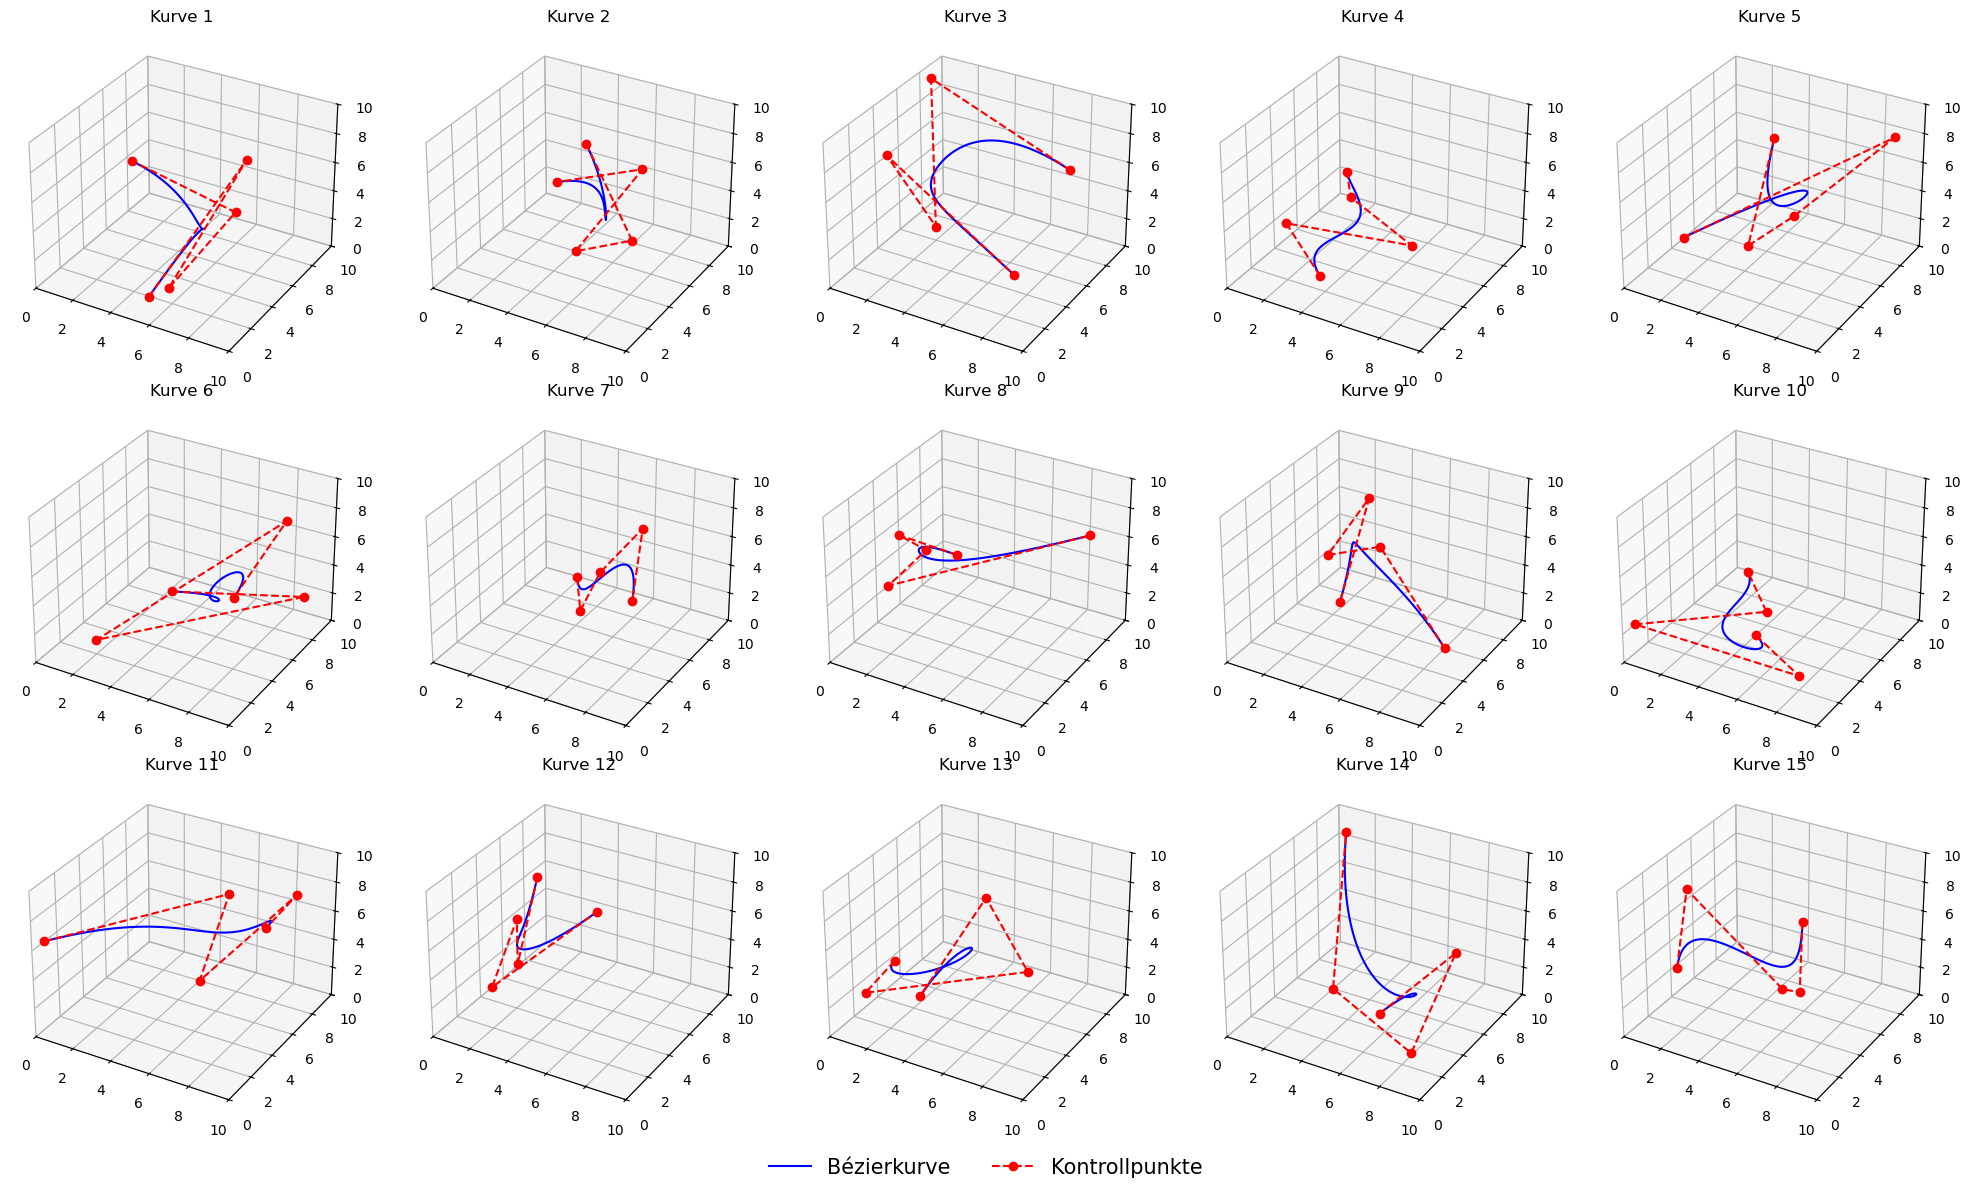

In [13]:
# 3. Plotten der ersten 15 zufallsgenerierten Bézierkurven zur Ansicht

# Erstellen einer 3D-Figur mit Subplots (3x5 Raster)
fig = plt.figure(figsize=(20, 12))
axes = [fig.add_subplot(3, 5, i + 1, projection='3d') for i in range(15)]

# Plotten der Bézierkurven
for idx, (ax, control_points) in enumerate(zip(axes, punkte_quartic)):
    bezier_curve = generate_bezier_points(control_points)  # Punkte auf der Bézierkurve generieren
    
    # Bézierkurve plotten
    ax.plot(bezier_curve[:, 0], bezier_curve[:, 1], bezier_curve[:, 2], color='blue', label='Bézierkurve')
    
    # Kontrollpunkte plotten
    control_points = np.array(control_points)  # Sicherstellen, dass Kontrollpunkte ein NumPy-Array sind
    ax.plot(control_points[:, 0], control_points[:, 1], control_points[:, 2], 'ro--', label='Kontrollpunkte')
    ax.scatter(control_points[:, 0], control_points[:, 1], control_points[:, 2], color='red')
    
    # Achsentitel und Skalierung
    ax.set_title(f"Kurve {idx + 1}", fontsize=12)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(0, 10)

# Entfernen überschüssiger Subplots, falls weniger als 15 Kurven vorhanden
for ax in axes[len(punkte_quartic):]:
    ax.axis('off')

# Globale Legende hinzufügen
fig.legend(
    ['Bézierkurve', 'Kontrollpunkte'],
    loc='lower center',
    ncol=2,
    fontsize=15,
    frameon=False
)

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Platz für die globale Legende unten schaffen
plt.show()

In [15]:
# 4. Modell fitten und ausgeben
# mit einigen Zusatzinformationen zur besseren Beurteilung

# Bestimmen und Ausgabe der kürzesten und längsten Länge, Durchschnitt und Median
min_length = df_trainingsdaten['Length'].round(5).min()        # Kürzeste Länge
max_length = df_trainingsdaten['Length'].round(5).max()        # Längste Länge
mean_length = df_trainingsdaten['Length'].mean().round(5)      # Durchschnitt
median_length = df_trainingsdaten['Length'].round(5).median()  # Median

print(
    f"Längen der Kurven: [{min_length}, {max_length}]\n"
    f"Mittelwert: {mean_length}\n"
    f"Median: {median_length}\n"
)

# Definition der Merkmale (Features) und des Zielwerts (Target)
# X: Eingabevariablen (Abstände zwischen den Kontrollpunkten)
X = df_trainingsdaten[[
    'D_P0_P1', 'D_P0_P2', 'D_P0_P3', 'D_P0_P4', 
    'D_P1_P2', 'D_P1_P3', 'D_P1_P4', 
    'D_P2_P3', 'D_P2_P4', 
    'D_P3_P4'
]]
# y: Zielvariable (Länge der Bézierkurve)
y = df_trainingsdaten['Length']

# Aufteilen der Daten in Trainings- und Testdatensätze
# 80% der Daten werden für das Training verwendet, 20% für das Testen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Modells
# Initialisierung eines linearen Regressionsmodells
model = LinearRegression()
# Training des Modells mit den Trainingsdaten
model.fit(X_train, y_train)

# Vorhersagen mit dem Modell
# Vorhersage der Zielwerte basierend auf den Testdaten
y_pred = model.predict(X_test)

# Evaluierung des Modells
# Berechnung der mittleren quadratischen Abweichung (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")  # Ausgabe der Abweichung

# Ausgabe der Modellparameter
# Die Koeffizienten der linearen Regression zeigen die Gewichtungen der einzelnen Merkmale
coefficients = model.coef_
intercept = model.intercept_  # Modell-Intercept 
print(f"Intercept: {intercept}\n")  # Ausgabe des Intercept
features = X.columns  # Speichert die Spaltennamen von X in der Variablen features

# Labels für den Index erstellen, angepasst für die neuen Variablen
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Erstellen eines DataFrame und setzen der Labels als Index
coef_df = pd.DataFrame({
    'Variable': labels,
    'Gewicht': coefficients.round(5),
    'Feature': features
})

# Ausgabe der Modellkoeffizienten
print("Gewichte der Linearen Regression:")
print(coef_df)


Längen der Kurven: [6.02551, 21.14245]
Mittelwert: 12.06148
Median: 12.06946

Mean Squared Error: 0.12464393029099967
Intercept: 0.15704511738399596

Gewichte der Linearen Regression:
  Variable  Gewicht  Feature
0        a  0.30804  D_P0_P1
1        b  0.35574  D_P0_P2
2        c  0.23657  D_P0_P3
3        d  0.09677  D_P0_P4
4        e -0.13769  D_P1_P2
5        f  0.19994  D_P1_P3
6        g  0.22765  D_P1_P4
7        h -0.13888  D_P2_P3
8        i  0.34910  D_P2_P4
9        j  0.30944  D_P3_P4


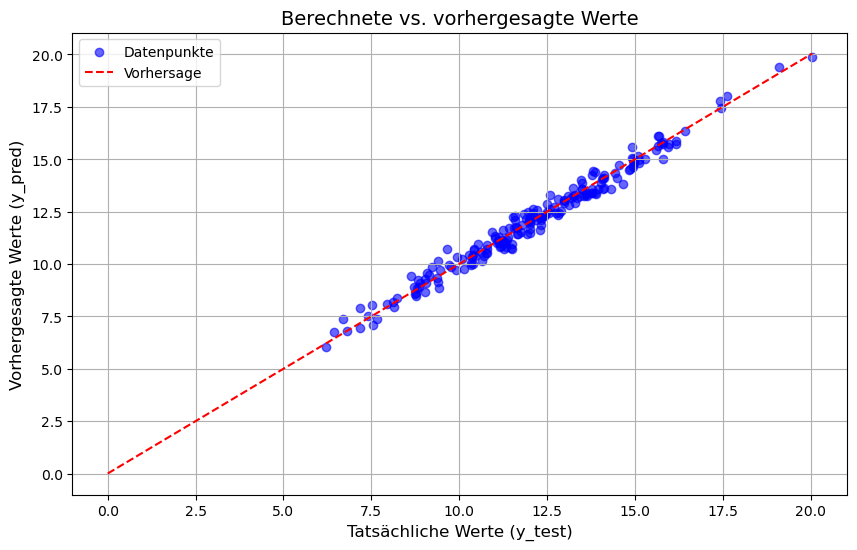

In [17]:
# 5. Plotten der realen Werte vs. der Vorhersage

# Anlage des Diagramms
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Datenpunkte')  # Streudiagramm

# Hinzufügen der Diagonalen für die Vorhersage
min_value = min(y_test.min(), y_pred.min(), 0)  # Kleinster Wert in den Daten
max_value = max(y_test.max(), y_pred.max())  # Größter Wert in den Daten
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Vorhersage')

# Achsenbeschriftungen und Titel
plt.xlabel('Tatsächliche Werte (y_test)', fontsize=12)
plt.ylabel('Vorhergesagte Werte (y_pred)', fontsize=12)
plt.title('Berechnete vs. vorhergesagte Werte', fontsize=14)

# Hinzufügen einer Legende und eines Gitters
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()